In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpezomwg2y/pubring.gpg' created
gpg: /tmp/tmpezomwg2y/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install -q keras

In [0]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [0]:
def load_data(data_path: str, test_size=0.2, random_state=42, info=False):
    """Load data from file.
    
    Args:
        data_path: str, file path to read data
        test_size: float, the ratio of test / all
        random_state: int, random seed to split data
        info: bool, control info print
    Returns:
        train_data: np.array, train set
        test_data: np.array, test set
    """
    # imgs = [np.array(Image.open(d)) for d in Path(data_path).iterdir()]
    imgs = []
    for d in Path(data_path).iterdir():
        if info:
            print('Load image: ' + d.name)
        imgs.append(np.array(Image.open(d)))
    data = np.array(imgs)
    train_data, test_data = train_test_split(
        data, test_size=test_size, random_state=random_state)
    return train_data, test_data

In [0]:
def load_label(label_path: str, test_size=0.2, random_state=42):
    """Load label from file.
    
    Args:
        label_path: str, file path to read label
        test_size: float, the ratio of test / all, 
            this arg should match up test_size in load_data
        random_state: int, random seed to split data
            this arg should match up random_state in load_data
    """
    with open(label_path, 'r') as f:
        labels = f.readline()
    train_label, test_label = train_test_split(
        labels.split('\t'), test_size=test_size, random_state=random_state)
    le = LabelEncoder()
    le.fit(train_label)
    return le.transform(train_label), le.transform(test_label)

In [0]:
train_label, test_label = load_label('./drive/data/FacePlace/AsianSample.txt')

In [8]:
train_data, test_data = load_data('./drive/data/FacePlace/AsianSample/', info=True)

Load image: AF0303_1110_NE.jpg
Load image: AF0303_2211_30L.jpg
Load image: AF0303_2211_00F.jpg
Load image: AF0303_1110_SU.jpg
Load image: AF0303_2211_30R.jpg
Load image: AF0303_1110_HA.jpg
Load image: AF0303_1110_90R.jpg
Load image: AF0303_1110_30R.jpg
Load image: AF0303_1110_45R.jpg
Load image: AF0303_1110_DI.jpg
Load image: AF0303_1110_90L.jpg
Load image: AF0303_1110_45L.jpg
Load image: AF0303_1110_CO.jpg
Load image: AF0303_1110_60L.jpg
Load image: AF0303_1110_60R.jpg
Load image: AF0303_1110_30L.jpg
Load image: AF0303_1110_00F.jpg
Load image: AF0302_2211_90R.jpg
Load image: AF0302_2211_NE.jpg
Load image: AF0302_2211_45R.jpg
Load image: AF0302_2211_60R.jpg
Load image: AF0302_2211_30R.jpg
Load image: AF0302_2211_60L.jpg
Load image: AF0302_2211_90L.jpg
Load image: AF0302_2211_45L.jpg
Load image: AF0302_2211_30L.jpg
Load image: AF0302_1110_NE.jpg
Load image: AF0302_1110_SA.jpg
Load image: AF0302_2211_00F.jpg
Load image: AF0302_1110_FE.jpg
Load image: AF0302_1110_DI.jpg
Load image: AF0302

Load image: AM0301_2201_45L.jpg
Load image: AM0301_2201_90L.jpg
Load image: AM0301_2201_NE.jpg
Load image: AM0301_2201_00F.jpg
Load image: AM0301_1101_NE.jpg
Load image: AM0301_1101_SU.jpg
Load image: AM0301_1101_SA.jpg
Load image: AM0301_1101_60R.jpg
Load image: AM0301_1101_CO.jpg
Load image: AM0301_1101_HA.jpg
Load image: AM0301_1101_90L.jpg
Load image: AM0301_1101_DI.jpg
Load image: AM0301_1101_90R.jpg
Load image: AM0301_1101_60L.jpg
Load image: AM0301_1101_00F.jpg
Load image: AM0301_1101_45R.jpg
Load image: AM0301_1101_30R.jpg
Load image: AF0305_3112_90L.jpg
Load image: AF0305_3112_NE.jpg
Load image: AF0305_3112_90R.jpg
Load image: AM0301_1101_30L.jpg
Load image: AM0301_1101_45L.jpg
Load image: AF0305_3112_60R.jpg
Load image: AF0305_3112_60L.jpg
Load image: AF0305_3112_30R.jpg
Load image: AF0305_3112_45R.jpg
Load image: AF0305_3112_45L.jpg
Load image: AF0305_2201_90R.jpg
Load image: AF0305_2201_NE.jpg
Load image: AF0305_3112_00F.jpg
Load image: AF0305_2201_90L.jpg
Load image: AF030

Load image: AF0303_2211_90L.jpg
Load image: AF0304_1100_30L.jpg
Load image: AF0303_2211_NE.jpg
Load image: AF0303_2211_90R.jpg
Load image: AF0304_1100_30R.jpg
Load image: AF0303_2211_60R.jpg
Load image: AF0303_2211_60L.jpg
Load image: AF0303_2211_45L.jpg
Load image: AF0303_2211_45R.jpg
Load image: AF0303_1110_SA.jpg
Load image: AM0305_2202_90L.jpg
Load image: AM0305_2202_NE.jpg
Load image: AM0305_2202_60R.jpg
Load image: AM0305_2202_60L.jpg
Load image: AM0305_2202_90R.jpg
Load image: AM0305_2202_45R.jpg
Load image: AM0305_2202_00F.jpg
Load image: AM0305_1101_AN.jpg
Load image: AM0305_2202_30R.jpg
Load image: AM0305_1101_90R.jpg
Load image: AM0305_2202_30L.jpg
Load image: AM0305_1101_NE.jpg
Load image: AM0305_1101_HA.jpg
Load image: AM0305_1101_SA.jpg
Load image: AM0305_2202_45L.jpg
Load image: AM0305_1101_90L.jpg
Load image: AM0305_1101_60R.jpg
Load image: AM0305_1101_45R.jpg
Load image: AM0305_1101_60L.jpg
Load image: AM0305_1101_30L.jpg
Load image: AM0304_2201_HA.jpg
Load image: AM03

Load image: AM0303_1100_90L.jpg
Load image: AM0303_1100_SA.jpg
Load image: AM0303_1100_DI.jpg
Load image: AM0303_1100_60R.jpg
Load image: AM0303_1100_NE.jpg
Load image: AM0303_2201_00F.jpg
Load image: AM0303_1100_HA.jpg
Load image: AM0303_1100_60L.jpg
Load image: AM0303_1100_30R.jpg
Load image: AM0303_1100_45L.jpg
Load image: AM0302_2201_60R.jpg
Load image: AM0303_1100_45R.jpg
Load image: AM0302_2201_NE.jpg
Load image: AM0302_2201_90R.jpg
Load image: AM0303_1100_00F.jpg
Load image: AM0303_1100_30L.jpg
Load image: AM0302_2201_90L.jpg
Load image: AM0302_2201_60L.jpg
Load image: AM0302_2201_30R.jpg
Load image: AM0302_2201_45R.jpg
Load image: AM0302_2201_45L.jpg
Load image: AM0302_2201_00F.jpg
Load image: AM0302_1100_SA.jpg
Load image: AM0302_2201_30L.jpg
Load image: AM0302_1100_NE.jpg
Load image: AM0302_1100_SU.jpg
Load image: AM0302_1100_HA.jpg
Load image: AM0302_1100_DI.jpg
Load image: AM0302_1100_45R.jpg
Load image: AM0302_1100_45L.jpg
Load image: AM0302_1100_30L.jpg
Load image: AM0302

In [0]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
train_label, val_label = train_test_split(train_label, test_size=0.2, random_state=42)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # randomly flip images
datagen.fit(train_data)

In [0]:
from keras import layers
from keras import models
from keras import optimizers

In [0]:
def vanilia_cnn(input_shape: tuple, classes: int):
    """Implement vanilia ConvNet model."""
    model = models.Sequential()
    model.add(
        layers.Conv2D(32, (3, 3), activation='relu',
                      padding='same',
                      input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [0]:
model = vanilia_cnn(input_shape=train_data[0].shape, classes=train_label.max() + 1)

In [15]:
history = model.fit_generator(
    datagen.flow(train_data, train_label, batch_size=20),
    epochs=200, validation_data=(val_data, val_label))

Epoch 1/200
9/9 [==============================] - 5s 580ms/step - loss: 2.4068 - acc: 0.1302 - val_loss: 2.3051 - val_acc: 0.0233
Epoch 2/200
9/9 [==============================] - 3s 323ms/step - loss: 2.3042 - acc: 0.1017 - val_loss: 2.3037 - val_acc: 0.0233
Epoch 3/200
9/9 [==============================] - 3s 329ms/step - loss: 2.3015 - acc: 0.1408 - val_loss: 2.3039 - val_acc: 0.0233
Epoch 4/200
9/9 [==============================] - 3s 334ms/step - loss: 2.3011 - acc: 0.1286 - val_loss: 2.3046 - val_acc: 0.0233
Epoch 5/200
9/9 [==============================] - 3s 325ms/step - loss: 2.3002 - acc: 0.1403 - val_loss: 2.3055 - val_acc: 0.0233
Epoch 6/200
9/9 [==============================] - 3s 337ms/step - loss: 2.3010 - acc: 0.1241 - val_loss: 2.3061 - val_acc: 0.0233
Epoch 7/200
9/9 [==============================] - 3s 332ms/step - loss: 2.2976 - acc: 0.1352 - val_loss: 2.3079 - val_acc: 0.0233
Epoch 8/200
9/9 [==============================] - 3s 330ms/step - loss: 2.3018 - a

9/9 [==============================] - 3s 332ms/step - loss: 2.2979 - acc: 0.1124 - val_loss: 2.3013 - val_acc: 0.0233
Epoch 14/200
9/9 [==============================] - 3s 334ms/step - loss: 2.3004 - acc: 0.1174 - val_loss: 2.2973 - val_acc: 0.0233
Epoch 15/200
9/9 [==============================] - 3s 332ms/step - loss: 2.2887 - acc: 0.1789 - val_loss: 2.2978 - val_acc: 0.0698
Epoch 16/200
9/9 [==============================] - 3s 332ms/step - loss: 2.2960 - acc: 0.1073 - val_loss: 2.3015 - val_acc: 0.0233
Epoch 17/200
9/9 [==============================] - 3s 327ms/step - loss: 2.2840 - acc: 0.1073 - val_loss: 2.2493 - val_acc: 0.1860
Epoch 18/200
9/9 [==============================] - 3s 331ms/step - loss: 2.2749 - acc: 0.1688 - val_loss: 2.2630 - val_acc: 0.2558
Epoch 19/200
9/9 [==============================] - 3s 327ms/step - loss: 2.2788 - acc: 0.1459 - val_loss: 2.3055 - val_acc: 0.0233
Epoch 20/200
9/9 [==============================] - 3s 334ms/step - loss: 2.2957 - acc: 0

9/9 [==============================] - 3s 326ms/step - loss: 2.2231 - acc: 0.1744 - val_loss: 2.1654 - val_acc: 0.2558
Epoch 26/200
9/9 [==============================] - 3s 330ms/step - loss: 2.1765 - acc: 0.1800 - val_loss: 2.1935 - val_acc: 0.1628
Epoch 27/200
9/9 [==============================] - 3s 327ms/step - loss: 2.1641 - acc: 0.1733 - val_loss: 2.1474 - val_acc: 0.2326
Epoch 28/200
9/9 [==============================] - 3s 338ms/step - loss: 2.2121 - acc: 0.1520 - val_loss: 2.1645 - val_acc: 0.2093
Epoch 29/200
9/9 [==============================] - 3s 330ms/step - loss: 2.2005 - acc: 0.1678 - val_loss: 2.1248 - val_acc: 0.2558
Epoch 30/200
9/9 [==============================] - 3s 327ms/step - loss: 2.1614 - acc: 0.2196 - val_loss: 2.2461 - val_acc: 0.1860
Epoch 31/200
9/9 [==============================] - 3s 327ms/step - loss: 2.0666 - acc: 0.1850 - val_loss: 2.2158 - val_acc: 0.1860
Epoch 32/200
9/9 [==============================] - 3s 333ms/step - loss: 2.0434 - acc: 0

9/9 [==============================] - 3s 334ms/step - loss: 1.8975 - acc: 0.2827 - val_loss: 2.4120 - val_acc: 0.1860
Epoch 38/200
9/9 [==============================] - 3s 333ms/step - loss: 1.9089 - acc: 0.2354 - val_loss: 2.5941 - val_acc: 0.1860
Epoch 39/200
9/9 [==============================] - 3s 329ms/step - loss: 1.8909 - acc: 0.3248 - val_loss: 2.3683 - val_acc: 0.1628
Epoch 40/200
9/9 [==============================] - 3s 328ms/step - loss: 1.8561 - acc: 0.2918 - val_loss: 2.5050 - val_acc: 0.1628
Epoch 41/200
9/9 [==============================] - 3s 329ms/step - loss: 1.7992 - acc: 0.2969 - val_loss: 2.8949 - val_acc: 0.1860
Epoch 42/200
9/9 [==============================] - 3s 331ms/step - loss: 1.8633 - acc: 0.3320 - val_loss: 2.3354 - val_acc: 0.1860
Epoch 43/200
9/9 [==============================] - 3s 324ms/step - loss: 1.7260 - acc: 0.3432 - val_loss: 3.7285 - val_acc: 0.1860
Epoch 44/200
9/9 [==============================] - 3s 329ms/step - loss: 1.5249 - acc: 0

9/9 [==============================] - 3s 327ms/step - loss: 1.5481 - acc: 0.4489 - val_loss: 2.5659 - val_acc: 0.1860
Epoch 50/200
9/9 [==============================] - 3s 332ms/step - loss: 1.4613 - acc: 0.4550 - val_loss: 2.8831 - val_acc: 0.1860
Epoch 51/200
9/9 [==============================] - 3s 330ms/step - loss: 1.3863 - acc: 0.4718 - val_loss: 3.3069 - val_acc: 0.2093
Epoch 52/200
9/9 [==============================] - 3s 325ms/step - loss: 1.4193 - acc: 0.5226 - val_loss: 2.9912 - val_acc: 0.2093
Epoch 53/200
9/9 [==============================] - 3s 330ms/step - loss: 1.4597 - acc: 0.4840 - val_loss: 2.5769 - val_acc: 0.1628
Epoch 54/200
9/9 [==============================] - 3s 332ms/step - loss: 1.3226 - acc: 0.5445 - val_loss: 2.9228 - val_acc: 0.2093
Epoch 55/200
9/9 [==============================] - 3s 325ms/step - loss: 1.2718 - acc: 0.5231 - val_loss: 3.3176 - val_acc: 0.2093
Epoch 56/200
9/9 [==============================] - 3s 327ms/step - loss: 1.2695 - acc: 0

9/9 [==============================] - 3s 327ms/step - loss: 1.0491 - acc: 0.6629 - val_loss: 3.3314 - val_acc: 0.1860
Epoch 62/200
9/9 [==============================] - 3s 323ms/step - loss: 1.0842 - acc: 0.5623 - val_loss: 4.1285 - val_acc: 0.1628
Epoch 63/200
9/9 [==============================] - 3s 317ms/step - loss: 1.2057 - acc: 0.5165 - val_loss: 4.7725 - val_acc: 0.1395
Epoch 64/200
9/9 [==============================] - 3s 324ms/step - loss: 1.2058 - acc: 0.5897 - val_loss: 3.6770 - val_acc: 0.1628
Epoch 65/200
9/9 [==============================] - 3s 326ms/step - loss: 1.1629 - acc: 0.5958 - val_loss: 3.4093 - val_acc: 0.1395
Epoch 66/200
9/9 [==============================] - 3s 320ms/step - loss: 1.0288 - acc: 0.5964 - val_loss: 4.4147 - val_acc: 0.1628
Epoch 67/200
9/9 [==============================] - 3s 326ms/step - loss: 0.9603 - acc: 0.6696 - val_loss: 3.5889 - val_acc: 0.1860
Epoch 68/200
9/9 [==============================] - 3s 330ms/step - loss: 1.0269 - acc: 0

9/9 [==============================] - 3s 330ms/step - loss: 0.9085 - acc: 0.6848 - val_loss: 4.3907 - val_acc: 0.1860
Epoch 74/200
9/9 [==============================] - 3s 330ms/step - loss: 0.9712 - acc: 0.6350 - val_loss: 3.4614 - val_acc: 0.1395
Epoch 75/200
9/9 [==============================] - 3s 333ms/step - loss: 0.9888 - acc: 0.6411 - val_loss: 4.1761 - val_acc: 0.1163
Epoch 76/200
9/9 [==============================] - 3s 334ms/step - loss: 0.8770 - acc: 0.6736 - val_loss: 3.7017 - val_acc: 0.1395
Epoch 77/200
9/9 [==============================] - 3s 332ms/step - loss: 0.9789 - acc: 0.6401 - val_loss: 4.4142 - val_acc: 0.1860
Epoch 78/200
9/9 [==============================] - 3s 323ms/step - loss: 0.8320 - acc: 0.7092 - val_loss: 4.1958 - val_acc: 0.2093
Epoch 79/200
9/9 [==============================] - 3s 329ms/step - loss: 0.8142 - acc: 0.7082 - val_loss: 3.6503 - val_acc: 0.1860
Epoch 80/200
9/9 [==============================] - 3s 339ms/step - loss: 0.8531 - acc: 0

9/9 [==============================] - 3s 329ms/step - loss: 0.6808 - acc: 0.7921 - val_loss: 6.0830 - val_acc: 0.2093
Epoch 86/200
9/9 [==============================] - 3s 329ms/step - loss: 0.6541 - acc: 0.7748 - val_loss: 4.0808 - val_acc: 0.1860
Epoch 87/200
9/9 [==============================] - 3s 323ms/step - loss: 0.7457 - acc: 0.7921 - val_loss: 4.8993 - val_acc: 0.1860
Epoch 88/200
9/9 [==============================] - 3s 327ms/step - loss: 0.6605 - acc: 0.7417 - val_loss: 3.8985 - val_acc: 0.0930
Epoch 89/200
9/9 [==============================] - 3s 328ms/step - loss: 0.6282 - acc: 0.7870 - val_loss: 4.7874 - val_acc: 0.1628
Epoch 90/200
9/9 [==============================] - 3s 330ms/step - loss: 0.6397 - acc: 0.7692 - val_loss: 4.6223 - val_acc: 0.0698
Epoch 91/200
9/9 [==============================] - 3s 332ms/step - loss: 0.6980 - acc: 0.7295 - val_loss: 5.2719 - val_acc: 0.0698
Epoch 92/200
9/9 [==============================] - 3s 330ms/step - loss: 0.6218 - acc: 0

9/9 [==============================] - 3s 332ms/step - loss: 0.6532 - acc: 0.7748 - val_loss: 5.4295 - val_acc: 0.1628
Epoch 98/200
9/9 [==============================] - 3s 332ms/step - loss: 0.6818 - acc: 0.7479 - val_loss: 5.3598 - val_acc: 0.1628
Epoch 99/200
9/9 [==============================] - 3s 327ms/step - loss: 0.7084 - acc: 0.7356 - val_loss: 6.5231 - val_acc: 0.0930
Epoch 100/200
9/9 [==============================] - 3s 328ms/step - loss: 0.7665 - acc: 0.7479 - val_loss: 3.6263 - val_acc: 0.1628
Epoch 101/200
9/9 [==============================] - 3s 329ms/step - loss: 0.7302 - acc: 0.7372 - val_loss: 5.4163 - val_acc: 0.1163
Epoch 102/200
9/9 [==============================] - 3s 329ms/step - loss: 0.7770 - acc: 0.6899 - val_loss: 3.0021 - val_acc: 0.2326
Epoch 103/200
9/9 [==============================] - 3s 330ms/step - loss: 0.4948 - acc: 0.8434 - val_loss: 3.9283 - val_acc: 0.2093
Epoch 104/200
9/9 [==============================] - 3s 327ms/step - loss: 0.4930 - a

9/9 [==============================] - 3s 334ms/step - loss: 0.4084 - acc: 0.8434 - val_loss: 3.8515 - val_acc: 0.1628
Epoch 110/200
9/9 [==============================] - 3s 327ms/step - loss: 0.4308 - acc: 0.8546 - val_loss: 4.7560 - val_acc: 0.1860
Epoch 111/200
9/9 [==============================] - 3s 330ms/step - loss: 0.5971 - acc: 0.7865 - val_loss: 4.1906 - val_acc: 0.1395
Epoch 112/200
9/9 [==============================] - 3s 325ms/step - loss: 0.4363 - acc: 0.8429 - val_loss: 5.6291 - val_acc: 0.2093
Epoch 113/200
9/9 [==============================] - 3s 333ms/step - loss: 0.5488 - acc: 0.7870 - val_loss: 4.4044 - val_acc: 0.1628
Epoch 114/200
9/9 [==============================] - 3s 325ms/step - loss: 0.4767 - acc: 0.8541 - val_loss: 4.3975 - val_acc: 0.1628
Epoch 115/200
9/9 [==============================] - 3s 332ms/step - loss: 0.4275 - acc: 0.8882 - val_loss: 5.0498 - val_acc: 0.1628
Epoch 116/200
9/9 [==============================] - 3s 329ms/step - loss: 0.4920 -

9/9 [==============================] - 3s 332ms/step - loss: 0.4647 - acc: 0.8317 - val_loss: 5.4850 - val_acc: 0.1860
Epoch 122/200
9/9 [==============================] - 3s 324ms/step - loss: 0.4695 - acc: 0.8155 - val_loss: 4.3939 - val_acc: 0.1628
Epoch 123/200
9/9 [==============================] - 3s 333ms/step - loss: 0.4723 - acc: 0.8150 - val_loss: 4.8377 - val_acc: 0.1628
Epoch 124/200
9/9 [==============================] - 3s 325ms/step - loss: 0.4243 - acc: 0.8429 - val_loss: 4.4113 - val_acc: 0.1628
Epoch 125/200
9/9 [==============================] - 3s 330ms/step - loss: 0.4301 - acc: 0.8648 - val_loss: 4.5431 - val_acc: 0.1628
Epoch 126/200
9/9 [==============================] - 3s 325ms/step - loss: 0.4027 - acc: 0.8586 - val_loss: 4.0884 - val_acc: 0.1860
Epoch 127/200
9/9 [==============================] - 3s 324ms/step - loss: 0.4186 - acc: 0.8592 - val_loss: 4.6642 - val_acc: 0.1860
Epoch 128/200
9/9 [==============================] - 3s 327ms/step - loss: 0.4677 -

9/9 [==============================] - 3s 332ms/step - loss: 0.3119 - acc: 0.9049 - val_loss: 5.3709 - val_acc: 0.1628
Epoch 134/200
9/9 [==============================] - 3s 321ms/step - loss: 0.2949 - acc: 0.9034 - val_loss: 4.8114 - val_acc: 0.1628
Epoch 135/200
9/9 [==============================] - 3s 339ms/step - loss: 0.4121 - acc: 0.8373 - val_loss: 4.7552 - val_acc: 0.1628
Epoch 136/200
9/9 [==============================] - 3s 325ms/step - loss: 0.3408 - acc: 0.8693 - val_loss: 4.4181 - val_acc: 0.1628
Epoch 137/200
9/9 [==============================] - 3s 329ms/step - loss: 0.4091 - acc: 0.8195 - val_loss: 3.6349 - val_acc: 0.1628
Epoch 138/200
9/9 [==============================] - 3s 329ms/step - loss: 0.3298 - acc: 0.8546 - val_loss: 4.8519 - val_acc: 0.1628
Epoch 139/200
9/9 [==============================] - 3s 328ms/step - loss: 0.3637 - acc: 0.8653 - val_loss: 4.0841 - val_acc: 0.1628
Epoch 140/200
9/9 [==============================] - 3s 327ms/step - loss: 0.2516 -

9/9 [==============================] - 3s 337ms/step - loss: 0.3320 - acc: 0.8597 - val_loss: 4.2691 - val_acc: 0.1860
Epoch 146/200
9/9 [==============================] - 3s 333ms/step - loss: 0.3324 - acc: 0.8765 - val_loss: 4.3957 - val_acc: 0.1860
Epoch 147/200
9/9 [==============================] - 3s 337ms/step - loss: 0.3415 - acc: 0.8541 - val_loss: 4.5121 - val_acc: 0.1860
Epoch 148/200
9/9 [==============================] - 3s 326ms/step - loss: 0.3845 - acc: 0.8648 - val_loss: 5.5614 - val_acc: 0.1628
Epoch 149/200
9/9 [==============================] - 3s 332ms/step - loss: 0.5502 - acc: 0.7966 - val_loss: 4.3777 - val_acc: 0.1628
Epoch 150/200
9/9 [==============================] - 3s 329ms/step - loss: 0.4840 - acc: 0.8261 - val_loss: 4.8861 - val_acc: 0.1628
Epoch 151/200
9/9 [==============================] - 3s 330ms/step - loss: 0.3818 - acc: 0.8876 - val_loss: 4.5441 - val_acc: 0.1395
Epoch 152/200
9/9 [==============================] - 3s 323ms/step - loss: 0.3488 -

9/9 [==============================] - 3s 320ms/step - loss: 0.2861 - acc: 0.9105 - val_loss: 5.5106 - val_acc: 0.2326
Epoch 158/200
9/9 [==============================] - 3s 319ms/step - loss: 0.2669 - acc: 0.9268 - val_loss: 5.2800 - val_acc: 0.1860
Epoch 159/200
9/9 [==============================] - 3s 323ms/step - loss: 0.2455 - acc: 0.9273 - val_loss: 5.6873 - val_acc: 0.2326
Epoch 160/200
9/9 [==============================] - 3s 330ms/step - loss: 0.2582 - acc: 0.9324 - val_loss: 6.3856 - val_acc: 0.2093
Epoch 161/200
9/9 [==============================] - 3s 323ms/step - loss: 0.2932 - acc: 0.9156 - val_loss: 5.7750 - val_acc: 0.2093
Epoch 162/200
9/9 [==============================] - 3s 320ms/step - loss: 0.3186 - acc: 0.8759 - val_loss: 4.7639 - val_acc: 0.1860
Epoch 163/200
9/9 [==============================] - 3s 328ms/step - loss: 0.2994 - acc: 0.8932 - val_loss: 5.5772 - val_acc: 0.2326
Epoch 164/200
9/9 [==============================] - 3s 319ms/step - loss: 0.2200 -

9/9 [==============================] - 3s 328ms/step - loss: 0.4183 - acc: 0.8251 - val_loss: 5.0137 - val_acc: 0.1860
Epoch 170/200
9/9 [==============================] - 3s 319ms/step - loss: 0.3084 - acc: 0.9100 - val_loss: 5.6103 - val_acc: 0.2093
Epoch 171/200
9/9 [==============================] - 3s 326ms/step - loss: 0.2567 - acc: 0.9100 - val_loss: 4.8338 - val_acc: 0.1628
Epoch 172/200
9/9 [==============================] - 3s 329ms/step - loss: 0.4164 - acc: 0.8597 - val_loss: 5.3878 - val_acc: 0.2326
Epoch 173/200
9/9 [==============================] - 3s 332ms/step - loss: 0.2185 - acc: 0.9329 - val_loss: 5.5294 - val_acc: 0.1395
Epoch 174/200
9/9 [==============================] - 3s 320ms/step - loss: 0.2879 - acc: 0.9207 - val_loss: 4.1464 - val_acc: 0.1860
Epoch 175/200
9/9 [==============================] - 3s 327ms/step - loss: 0.2183 - acc: 0.9207 - val_loss: 4.9832 - val_acc: 0.1860
Epoch 176/200
9/9 [==============================] - 3s 335ms/step - loss: 0.3219 -

9/9 [==============================] - 3s 330ms/step - loss: 0.1897 - acc: 0.9268 - val_loss: 6.8787 - val_acc: 0.2093
Epoch 182/200
9/9 [==============================] - 3s 320ms/step - loss: 0.1749 - acc: 0.9441 - val_loss: 5.6700 - val_acc: 0.1395
Epoch 183/200
9/9 [==============================] - 3s 326ms/step - loss: 0.1588 - acc: 0.9385 - val_loss: 6.1567 - val_acc: 0.1163
Epoch 184/200
9/9 [==============================] - 3s 317ms/step - loss: 0.3599 - acc: 0.9044 - val_loss: 6.0510 - val_acc: 0.2093
Epoch 185/200
9/9 [==============================] - 3s 319ms/step - loss: 0.2617 - acc: 0.9273 - val_loss: 4.8355 - val_acc: 0.2093
Epoch 186/200
9/9 [==============================] - 3s 327ms/step - loss: 0.1061 - acc: 0.9720 - val_loss: 5.2037 - val_acc: 0.2093
Epoch 187/200
9/9 [==============================] - 3s 331ms/step - loss: 0.2360 - acc: 0.9161 - val_loss: 5.2195 - val_acc: 0.2093
Epoch 188/200
9/9 [==============================] - 3s 331ms/step - loss: 0.1561 -

9/9 [==============================] - 3s 333ms/step - loss: 0.3617 - acc: 0.8485 - val_loss: 5.1187 - val_acc: 0.1860
Epoch 194/200
9/9 [==============================] - 3s 327ms/step - loss: 0.2209 - acc: 0.8932 - val_loss: 5.0726 - val_acc: 0.2093
Epoch 195/200
9/9 [==============================] - 3s 321ms/step - loss: 0.2513 - acc: 0.9100 - val_loss: 4.9083 - val_acc: 0.1628
Epoch 196/200
9/9 [==============================] - 3s 333ms/step - loss: 0.2308 - acc: 0.9105 - val_loss: 5.3967 - val_acc: 0.1163
Epoch 197/200
9/9 [==============================] - 3s 324ms/step - loss: 0.2250 - acc: 0.9212 - val_loss: 5.9334 - val_acc: 0.1395
Epoch 198/200
9/9 [==============================] - 3s 328ms/step - loss: 0.1552 - acc: 0.9441 - val_loss: 5.6675 - val_acc: 0.1860
Epoch 199/200
9/9 [==============================] - 3s 325ms/step - loss: 0.1643 - acc: 0.9324 - val_loss: 6.6603 - val_acc: 0.1628
Epoch 200/200
9/9 [==============================] - 3s 331ms/step - loss: 0.1025 -

In [0]:
model.save('./drive/asian_vanilia3.h5')

In [0]:
import matplotlib.pyplot as plt

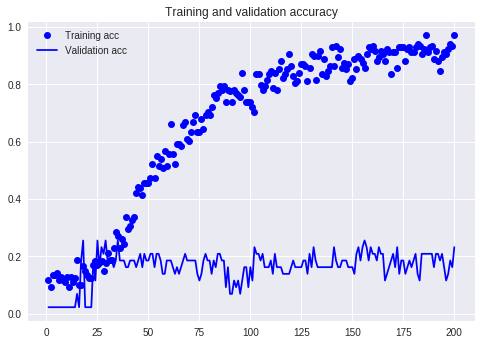

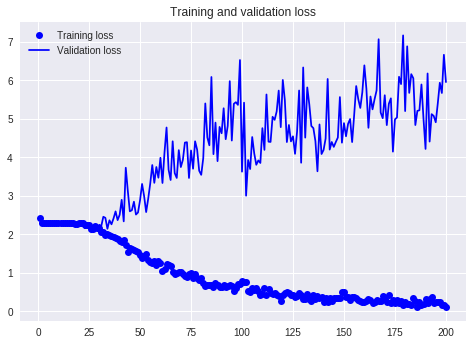

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
result = model.evaluate(test_data, test_label)